Basic Data Exploration

In [3]:
#import liblary

import pandas as pd
import numpy as np

#google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [7]:
#lokasi baca file
home_file_path = 'gdrive/My Drive/dataset/melb_data.csv'
#baca data
home_data = pd.read_csv(home_file_path)
#print data 
home_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13580.000000,1.358000e+04,13580.000000,13580.000000,13580.000000,13580.000000,13518.000000,13580.000000,7130.000000,8205.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,1.075684e+06,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,144.995216,7454.417378
std,0.955748,6.393107e+05,5.868725,90.676964,0.965921,0.691712,0.962634,3990.669241,541.014538,37.273762,0.079260,0.103916,4378.581772
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1940.000000,-37.856822,144.929600,4380.000000
50%,3.000000,9.030000e+05,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.802355,145.000100,6555.000000
75%,3.000000,1.330000e+06,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,174.000000,1999.000000,-37.756400,145.058305,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


Exercise: Your First Machine Learning Model

In [8]:
# What is the average lot size (rounded to nearest integer)?
avg_lot_size = round(home_data['Landsize'].mean())

# As of today, how old is the newest home (current year - the date in which it was built)
newest_home_age = 2021 - 2018

In [10]:
# print the list of columns in the dataset to find the name of the prediction target
home_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [56]:
home_data = home_data.dropna(axis=0)

In [57]:
Y = home_data.Price

In [58]:
# Create the list of features below
feature_names = ['Rooms', 'Distance', 'Bedroom2', 'Landsize', 'Bathroom', 'YearBuilt', 'Lattitude', 'Longtitude']

# Select data corresponding to features in feature_names
X = home_data[feature_names]

In [59]:
# Review data
# print description or statistics from X
print(X.describe())

# print the top few lines
print(X.head())

             Rooms     Distance  ...    Lattitude   Longtitude
count  6196.000000  6196.000000  ...  6196.000000  6196.000000
mean      2.931407     9.751097  ...   -37.807904   144.990201
std       0.971079     5.612065  ...     0.075850     0.099165
min       1.000000     0.000000  ...   -38.164920   144.542370
25%       2.000000     5.900000  ...   -37.855438   144.926198
50%       3.000000     9.000000  ...   -37.802250   144.995800
75%       4.000000    12.400000  ...   -37.758200   145.052700
max       8.000000    47.400000  ...   -37.457090   145.526350

[8 rows x 8 columns]
   Rooms  Distance  Bedroom2  ...  YearBuilt  Lattitude  Longtitude
1      2       2.5       2.0  ...     1900.0   -37.8079    144.9934
2      3       2.5       3.0  ...     1900.0   -37.8093    144.9944
4      4       2.5       3.0  ...     2014.0   -37.8072    144.9941
6      3       2.5       4.0  ...     1910.0   -37.8024    144.9993
7      2       2.5       2.0  ...     1890.0   -37.8060    144.9954

[5

In [60]:
from sklearn.tree import DecisionTreeRegressor
#specify the model. 
#For model reproducibility, set a numeric value for random_state when specifying the model
iowa_model = DecisionTreeRegressor(random_state=1)

# Fit the model
iowa_model.fit(X, Y)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [61]:
predictions = iowa_model.predict(X)
print(predictions)

[1035000. 1465000. 1600000. ...  385000.  560000. 2450000.]


In [62]:
Y.head()

1    1035000.0
2    1465000.0
4    1600000.0
6    1876000.0
7    1636000.0
Name: Price, dtype: float64

Model Validation

In [63]:
# Import the train_test_split function and uncomment
from sklearn.model_selection import train_test_split
# fill in and uncomment
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state=1)

In [64]:
# You imported DecisionTreeRegressor in your last exercise
# and that code has been copied to the setup code above. So, no need to
# import it again

# Specify the model
iowa_model = DecisionTreeRegressor(random_state=1)

# Fit iowa_model with the training data.
iowa_model.fit(train_X, train_Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=1, splitter='best')

In [65]:
# Predict with all validation observations
val_predictions = iowa_model.predict(val_X)
# print the top few validation predictions
print(val_predictions[:5])
# print the top few actual prices from validation data
print(val_Y[:5])

[ 450000. 3460000.  760000.  920000. 5046000.]
6048     620000.0
9186    2320000.0
3991     750000.0
5829    1120000.0
3616    6500000.0
Name: Price, dtype: float64


In [66]:
from sklearn.metrics import mean_absolute_error
val_mae = mean_absolute_error(val_Y, val_predictions)

# uncomment following line to see the validation_mae
#print(val_mae)

Exercise: Underfitting and Overfitting

In [67]:
def get_mae(max_leaf_nodes, train_X, val_X, train_Y, val_Y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_Y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_Y, preds_val)
    return(mae)

In [68]:
candidate_max_leaf_nodes = [5, 25, 50, 100, 250, 500]
# Write loop to find the ideal tree size from candidate_max_leaf_nodes
list_mae = []
for num_nodes in candidate_max_leaf_nodes:
        result = get_mae(num_nodes, train_X, val_X, train_Y, val_Y)
        list_mae.append(result)  

# Store the best value of max_leaf_nodes (it will be either 5, 25, 50, 100, 250 or 500)
best_tree_size = candidate_max_leaf_nodes[list_mae.index(min(list_mae))]

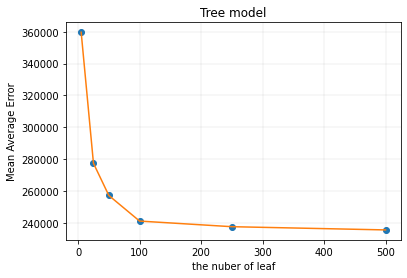

In [69]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot as plot
#import seaborn as sns

#To check whether data is correct
#print(candidate_max_leaf_nodes)
#print(list_mae)

# Variables
a = candidate_max_leaf_nodes
b = list_mae

# Plot
plot(a, b ,'o')
plot(a, b, '-')
plt.xlabel('the nuber of leaf')
plt.ylabel('Mean Average Error')
plt.title('Tree model')
plt.grid(color='grey', linestyle='-', linewidth=0.25, alpha=0.5)

In [70]:
# Fill in argument to make optimal size and uncomment
final_model = DecisionTreeRegressor(max_leaf_nodes=best_tree_size, random_state=0)

# fit the final model and uncomment the next two lines
final_model.fit(X, Y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=500,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [71]:
from sklearn.ensemble import RandomForestRegressor

# Define the model. Set random_state to 1
rf_model = RandomForestRegressor(random_state = 1)

# fit your model
rf_model.fit(train_X, train_Y)
rf_model_preds = rf_model.predict(val_X)

# Calculate the mean absolute error of your Random Forest model on the validation data
rf_val_mae = mean_absolute_error(val_Y, rf_model_preds)

print("Validation MAE for Random Forest Model: {}".format(rf_val_mae))

Validation MAE for Random Forest Model: 180786.16724276802
